In [1]:
import sys
sys.path.append(r'C:\Users\Gosia\Desktop\FDR-Metabolomics\src\passatutto_parser.py')
import passatutto_parser as pp

In [ ]:
pre_spectrums_query = pp.PassatuttoParser(r'C:\Users\Gosia\Desktop\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatuttoParser(r'C:\Users\Gosia\Desktop\Gnps_Noise_Filtered').parse_folder()

In [16]:
from pprint import pprint
pprint(pre_spectrums_query[300])
pprint(pre_spectrums_lib[150])

{'adduct': '[M+H]+',
 'charge': 1,
 'compound_name': 'Terbutylazine-2-hydroxy',
 'formula_smiles': 'C9H17N5O',
 'inchi': 'InChI=1S/C9H17N5O/c1-5-10-6-11-7(13-8(15)12-6)14-9(2,3)4/h5H2,1-4H3,(H3,10,11,12,13,14,15)',
 'instrument': 'LTQ Orbitrap XL Thermo Scientific',
 'parent_mass': 212.1506,
 'peaks_json': [[86.0348, 568047.4],
                [156.088, 243191855.3],
                [170.1039, 367586.9],
                [57.0699, 457733.3],
                [69.0083, 362546.9],
                [86.0349, 2991869.7],
                [97.0396, 313226.1],
                [114.0662, 2310417.2],
                [128.0568, 327537.4],
                [156.0879, 136076059.0],
                [212.1503, 9489843.2],
                [86.0349, 83326.5],
                [156.088, 66792854.0],
                [170.1037, 98552.1],
                [57.0699, 626976.3],
                [68.0244, 299507.8],
                [69.0084, 11720196.1],
                [71.0604, 1236367.6],
                [85.050

In [ ]:
from matchms.importing.load_from_json import as_spectrum
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 10 == 0:
        print('processed %d', i)
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 10 == 0:
        print('processed %d', i)

In [10]:
print(len(spectrums_lib))
print(len(spectrums_query))

4096
458


In [48]:
from rdkit.Chem import MolFromSmiles, MolToSmiles
from rdkit.Chem.inchi import MolFromInchi, MolToInchi
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula

for s in spectrums_query:
    mol = MolFromSmiles(s.get('smiles'))
    if mol is None:
        #pprint(s.metadata)
        mol = MolFromInchi(s.get('inchi'))
        print( MolToSmiles(mol) )
        print(  s.get('smiles') )
    else:
        print( s.get('inchi'))
        print( MolToInchi(mol))
    exact_mass_smi = CalcExactMolWt(mol)
    #print(mol,exact_mass_smi,s.get('parent_mass'))
    #if s.get('parent_mass') is None:
        
        

InChI=1S/C5H11NO4S/c1-5(7)6-3-2-4-11(8,9)10/h2-4H2,1H3,(H,6,7)(H,8,9,10)
InChI=1S/C5H11NO4S/c1-5(7)6-3-2-4-11(8,9)10/h2-4H2,1H3,(H,6,7)(H,8,9,10)
InChI=1S/C13H15N3O2/c1-9-12(14-10(2)17)13(18)16(15(9)3)11-7-5-4-6-8-11/h4-8H,1-3H3,(H,14,17)
InChI=1S/C13H15N3O2/c1-9-12(14-10(2)17)13(18)16(15(9)3)11-7-5-4-6-8-11/h4-8H,1-3H3,(H,14,17)
InChI=1S/C10H11ClN4/c1-8(14-7-12)15(2)6-9-3-4-10(11)13-5-9/h3-5H,6H2,1-2H3/b14-8+
InChI=1S/C10H11ClN4/c1-8(14-7-12)15(2)6-9-3-4-10(11)13-5-9/h3-5H,6H2,1-2H3/b14-8+
InChI=1S/C14H20ClNO2/c1-4-12-8-6-7-11(3)14(12)16(10-18-5-2)13(17)9-15/h6-8H,4-5,9-10H2,1-3H3
InChI=1S/C14H20ClNO2/c1-4-12-8-6-7-11(3)14(12)16(10-18-5-2)13(17)9-15/h6-8H,4-5,9-10H2,1-3H3
InChI=1S/C14H20ClNO2/c1-4-11-7-6-8-12(5-2)14(11)16(10-18-3)13(17)9-15/h6-8H,4-5,9-10H2,1-3H3
InChI=1S/C14H20ClNO2/c1-4-11-7-6-8-12(5-2)14(11)16(10-18-3)13(17)9-15/h6-8H,4-5,9-10H2,1-3H3
InChI=1S/C13H21NO3/c1-13(2,3)14-7-12(17)9-4-5-11(16)10(6-9)8-15/h4-6,12,14-17H,7-8H2,1-3H3
InChI=1S/C13H21NO3/c1-13(2,3)14-7-12(17)9

InChI=1S/C7H7N3/c1-5-2-3-6-7(4-5)9-10-8-6/h2-4H,1H3,(H,8,9,10)
InChI=1S/C5H8N4O/c1-3-7-4(6)9-5(8-3)10-2/h1-2H3,(H2,6,7,8,9)
InChI=1S/C5H8N4O/c1-3-7-4(6)9-5(8-3)10-2/h1-2H3,(H2,6,7,8,9)
InChI=1S/C22H30O5/c1-12-8-14-15-5-7-22(27,18(26)11-23)21(15,3)10-17(25)19(14)20(2)6-4-13(24)9-16(12)20/h4,6,9,12,14-15,17,19,23,25,27H,5,7-8,10-11H2,1-3H3/t12-,14-,15-,17-,19+,20-,21-,22-/m0/s1
InChI=1S/C22H30O5/c1-12-8-14-15-5-7-22(27,18(26)11-23)21(15,3)10-17(25)19(14)20(2)6-4-13(24)9-16(12)20/h4,6,9,12,14-15,17,19,23,25,27H,5,7-8,10-11H2,1-3H3/t12-,14-,15-,17-,19+,20-,21-,22-/m0/s1
InChI=1S/C14H22ClN3O2/c1-4-18(5-2)7-6-17-14(19)10-8-11(15)12(16)9-13(10)20-3/h8-9H,4-7,16H2,1-3H3,(H,17,19)
InChI=1S/C14H22ClN3O2/c1-4-18(5-2)7-6-17-14(19)10-8-11(15)12(16)9-13(10)20-3/h8-9H,4-7,16H2,1-3H3,(H,17,19)
InChI=1S/C15H22ClNO2/c1-5-13-8-6-7-11(2)15(13)17(14(18)9-16)12(3)10-19-4/h6-8,12H,5,9-10H2,1-4H3
InChI=1S/C15H22ClNO2/c1-5-13-8-6-7-11(2)15(13)17(14(18)9-16)12(3)10-19-4/h6-8,12H,5,9-10H2,1-4H3
InChI=1S/C15H23NO

InChI=1S/C6H14O6/c7-1-3(9)5(11)6(12)4(10)2-8/h3-12H,1-2H2/t3-,4-,5-,6-/m1/s1
InChI=1S/C5H11NO2S/c1-9-3-2-4(6)5(7)8/h4H,2-3,6H2,1H3,(H,7,8)
InChI=1S/C5H11NO2S/c1-9-3-2-4(6)5(7)8/h4H,2-3,6H2,1H3,(H,7,8)
InChI=1S/C16H16O9/c1-6-4-10(17)24-9-5-7(2-3-8(6)9)23-16-13(20)11(18)12(19)14(25-16)15(21)22/h2-5,11-14,16,18-20H,1H3,(H,21,22)/t11-,12-,13+,14-,16+/m0/s1
InChI=1S/C16H16O9/c1-6-4-10(17)24-9-5-7(2-3-8(6)9)23-16-13(20)11(18)12(19)14(25-16)15(21)22/h2-5,11-14,16,18-20H,1H3,(H,21,22)/t11-,12-,13+,14-,16+/m0/s1
InChI=1S/C27H32O14/c1-10-20(32)22(34)24(36)26(37-10)41-25-23(35)21(33)18(9-28)40-27(25)38-13-6-14(30)19-15(31)8-16(39-17(19)7-13)11-2-4-12(29)5-3-11/h2-7,10,16,18,20-30,32-36H,8-9H2,1H3/t10-,16-,18+,20-,21+,22+,23-,24+,25+,26-,27+/m0/s1
InChI=1S/C27H32O14/c1-10-20(32)22(34)24(36)26(37-10)41-25-23(35)21(33)18(9-28)40-27(25)38-13-6-14(30)19-15(31)8-16(39-17(19)7-13)11-2-4-12(29)5-3-11/h2-7,10,16,18,20-30,32-36H,8-9H2,1H3/t10-,16-,18+,20-,21+,22+,23-,24+,25+,26-,27+/m0/s1
InChI=1S/C21H27N7

In [50]:
c = 0
for s in spectrums_lib:
    if s.get('parent_mass') is None:
        c += 1
print(c)

0


In [45]:
help(mol)

Help on Mol in module rdkit.Chem.rdchem object:

class Mol(Boost.Python.instance)
 |  The Molecule class.
 |  
 |  In addition to the expected Atoms and Bonds, molecules contain:
 |    - a collection of Atom and Bond bookmarks indexed with integers
 |        that can be used to flag and retrieve particular Atoms or Bonds
 |        using the {get|set}{Atom|Bond}Bookmark() methods.
 |  
 |    - a set of string-valued properties. These can have arbitrary string
 |        labels and can be set and retrieved using the {set|get}Prop() methods
 |        Molecular properties can be tagged as being *computed*, in which case
 |          they will be automatically cleared under certain circumstances (when the
 |          molecule itself is modified, for example).
 |        Molecules also have the concept of *private* properties, which are tagged
 |          by beginning the property name with an underscore (_).
 |  
 |  Method resolution order:
 |      Mol
 |      Boost.Python.instance
 |      bu

In [30]:
import bisect
import numpy as np
# a filter to check if there is a fragme the precursor
def has_frag(spectrum, mz, tol, tol_units='absolute'):
    if mz is None:
        pprint(spectrum.metadata)
        return
    if tol_units == 'ppm':
        di = tol_ppm*mz/1e6
    else:
        di = tol
    min_mz = mz - di
    max_mz = mz + di
    pos = bisect.bisect_right(spectrum.peaks[0], min_mz)
    pos2 = bisect.bisect_right(spectrum.peaks[0], max_mz)
    if pos == pos2:
        return None
    else:
        max_pos = pos + np.argmax(spectrum.peaks[1][pos:pos2])
        return (spectrum.peaks[0][max_pos], spectrum.peaks[1][max_pos])

In [31]:
spec_with_precursor_lib = [s for s in spectrums_lib if has_frag(s, s.get('parent_mass'), 0.2)  is not None]
spec_with_precursor_query = [s for s in spectrums_query if has_frag(s, s.get('parent_mass'), 0.2)  is not None]

{'adduct': '[M]+',
 'charge': 1,
 'compound_name': 'Cyanidin '
                  "3-O-[2''-O-(xylosyl)-6''-O-(p-O-(glucosyl)-p-coumaroyl) "
                  'glucoside] 5-O-glucoside',
 'formula_smiles': 'C47H55O27',
 'inchi': 'InChI=1S/C47H54O27/c48-13-28-33(56)36(59)40(63)45(71-28)67-20-5-1-17(2-6-20)3-8-31(54)65-16-30-35(58)38(61)43(74-44-39(62)32(55)24(53)15-66-44)47(73-30)70-27-12-21-25(68-42(27)18-4-7-22(51)23(52)9-18)10-19(50)11-26(21)69-46-41(64)37(60)34(57)29(14-49)72-46/h1-12,24,28-30,32-41,43-49,53,55-64H,13-16H2,(H2-,50,51,52)/p+1/b8-3+/t24-,28?,29?,30?,32-,33-,34-,35-,36?,37?,38?,39?,40+,41+,43+,44+,45-,46-,47-/m1/s1',
 'instrument': 'LTQ Orbitrap XL, Thermo Scientfic; HP-1100 HPLC, Agilent',
 'smiles': 'C1[C@H]([C@H](C([C@@H](O1)O[C@@H]2[C@@H](OC([C@H](C2O)O)COC(=O)/C=C/C3=CC=C(C=C3)O[C@H]4[C@H](C([C@@H](C(O4)CO)O)O)O)OC5=C([O+]=C6C=C(C=C(C6=C5)O[C@H]7[C@H](C([C@@H](C(O7)CO)O)O)O)O)C8=CC(=C(C=C8)O)O)O)O)O'}
{'adduct': '[M]+',
 'charge': 1,
 'compound_name': "Cyanidin 3-O

 '64.536403': '4858.843262',
 '64.634124': '2341.513184',
 '65.01145': '1804.953247',
 '65.022216': '2030.77478',
 '65.025845': '4610.229004',
 '65.036068': '6027.29248',
 '65.375314': '3942.64502',
 '65.534642': '94755.8125',
 '65.588366': '10127.432617',
 '66.035918': '22786.451172',
 '66.045958': '3979.272949',
 '66.05996': '1878.814331',
 '66.09366': '7713.136719',
 '66.283065': '6153.453613',
 '66.381883': '2723.080566',
 '66.532295': '7002.237305',
 '67.012526': '5864.023926',
 '67.018924': '7059.124023',
 '67.033278': '3977.430664',
 '67.033727': '25961.484375',
 '67.082848': '4239.118164',
 '67.095929': '3568.233887',
 '67.172151': '2564.443359',
 '67.353163': '8035.288086',
 '67.494971': '5512.012695',
 '67.508336': '6223.262695',
 '67.525521': '1657.442993',
 '67.533158': '2337.617188',
 '67.687611': '1936.911499',
 '67.743908': '7610.458984',
 '67.995594': '4643.447754',
 '68.028105': '2359.298828',
 '68.035755': '2212.293945',
 '68.078788': '3373.341797',
 '68.082647': '419

 '37.343196': '66667.921875',
 '37.511638': '2641.421387',
 '38.002106': '2021.411011',
 '38.002134': '4452.177734',
 '38.091257': '109786.929688',
 '38.135712': '6651.41748',
 '38.252048': '2060.831543',
 '38.346895': '6862.706543',
 '39.094691': '3860.504883',
 '39.148895': '1959.905884',
 '40.00969': '3700.353027',
 '40.179785': '8003.641602',
 '41.95849': '14704.542969',
 '42.122524': '3928.759766',
 '42.959732': '3030.904785',
 '421.98791': '2782.904785',
 '43.009096': '2701.166992',
 '43.014105': '3272.973633',
 '43.016251': '2736.736816',
 '43.020545': '7396.941406',
 '43.02627': '1104816.375',
 '43.030563': '11698.982422',
 '43.03271': '9642.569336',
 '43.03772': '3437.401855',
 '43.039341': '53120.695313',
 '43.044161': '3028.100586',
 '43.045896': '7850.075195',
 '43.092119': '2477.402344',
 '43.106576': '1965.71936',
 '43.142799': '3227.168457',
 '43.206958': '5656.398926',
 '44.023479': '1999.98938',
 '44.029067': '43933.378906',
 '44.033387': '1742.427612',
 '44.237292': '

 '72.152025': '49724.035156',
 '74.12715': '68326.984375',
 '74.127584': '518093.6875',
 '74.21156': '173842.609375',
 '75.130548': '30767.111328',
 '75.215217': '22099.365234',
 '76.012896': '20425.154297',
 '77.199902': '18561.072266',
 '79.0632': '89463.007813',
 '79.157671': '29937.880859',
 '80.261407': '80175.523438',
 '80.262808': '58498.402344',
 '82.219999': '19531.324219',
 '82.220291': '31458.675781',
 '82.984796': '451132.78125',
 '86.955501': '68094.875',
 '87.125577': '256236.078125',
 '90.992536': '45868.71875',
 '91.282894': '852442.3125',
 '92.286254': '139541.578125',
 '94.344951': '2163789.0',
 '94.347027': '1343517.125',
 '95.349218': '299879.75',
 '96.352371': '25755.005859',
 '99.028604': '39696.339844',
 '99.179842': '123792.15625',
 '99.987228': '18268.808594',
 'charge': 1,
 'compound_name': '4-Aminobutanoate',
 'formula_smiles': 'C4H9NO2',
 'inchi': 'InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)',
 'instrument': 'LTQ Orbitrap XL, Thermo Scientfic',
 'ms1pea

 '04.955487': '2481.683105',
 '04.966719': '920.265259',
 '04.975773': '2182.202637',
 '049.581865': '959.517334',
 '05.084864': '2157.925781',
 '05.19419': '3349.644531',
 '05.199225': '1435.512085',
 '05.567057': '1490.164795',
 '05.985459': '4962.507324',
 '06.068909': '1014.725098',
 '06.197685': '1170.807861',
 '07.004349': '2803.200684',
 '07.0066': '1361.90332',
 '07.069996': '25607.5625',
 '07.888697': '958.824097',
 '07.984978': '1358.718384',
 '07.997484': '1106.531738',
 '074.919778': '1797.442261',
 '08.132361': '1956.807739',
 '08.190223': '39980.292969',
 '08.241047': '1178.698486',
 '084.084378': '2115.722656',
 '09.022163': '3022.319824',
 '09.027968': '1048.920044',
 '09.130226': '1477.4552',
 '09.193016': '1057.212158',
 '09.225723': '1301.559082',
 '09.521199': '1375.802002',
 '09.973577': '1220.958008',
 '09.978778': '1120.006958',
 '09.995336': '1741.020142',
 '10.018002': '2293.046387',
 '10.019963': '120427.78125',
 '10.021707': '2100.779297',
 '10.127107': '1730

 '15.063034': '55782.265625',
 '17.104082': '27676.652344',
 '19.162386': '35758.089844',
 '23.062608': '46088.71875',
 '23.063237': '96419.398438',
 '23.065125': '25848.984375',
 '26.123685': '22154.318359',
 '26.772482': '22760.304688',
 '26.934472': '47160.519531',
 '26.935117': '38536.4375',
 '27.053331': '119712.742188',
 '27.053978': '127840.171875',
 '27.075305': '30132.722656',
 '27.090817': '54554.046875',
 '27.091464': '44201.191406',
 '27.093403': '25273.544922',
 '27.095989': '66580.304688',
 '27.096635': '132106.515625',
 '27.098574': '53053.136719',
 '27.099867': '50281.292969',
 '27.103099': '216356.34375',
 '27.105039': '51299.960938',
 '27.107625': '422338.0',
 '27.112796': '44566412.0',
 '27.113443': '31060804.0',
 '27.117322': '347435.125',
 '27.118615': '264587.65625',
 '27.119261': '391813.21875',
 '27.121847': '177887.28125',
 '27.123787': '107425.523438',
 '27.124434': '197159.171875',
 '27.12702': '90672.273438',
 '27.128959': '81631.703125',
 '27.129606': '7114

 '88.038451': '1292.590576',
 '88.125576': '1563.012451',
 '88.129475': '41364.496094',
 '88.142635': '1653.622559',
 '88.960432': '6437.857422',
 '89.121821': '12000.205078',
 '89.14786': '3221.455566',
 '89.235929': '2533.58252',
 '89.268828': '1249.566895',
 '89.458397': '1373.151123',
 '90.028489': '5045.416504',
 '90.049272': '1592.618652',
 '90.158191': '1489.433838',
 '90.386985': '7858.619141',
 '90.987551': '1309.872803',
 '91.148429': '1681.3396',
 '91.246348': '2071.19043',
 '91.255118': '2407.579102',
 '91.259504': '4115.115723',
 '91.263889': '2769.556885',
 '91.269737': '7364.558105',
 '91.284356': '1222993.0',
 '91.297514': '7546.691895',
 '91.3019': '2830.92041',
 '91.306286': '3271.6604',
 '91.320907': '1828.898193',
 '91.323832': '1566.126709',
 '91.326756': '1298.091797',
 '91.387439': '2001.437744',
 '91.41889': '1777.597412',
 '91.515447': '1273.387451',
 '92.261306': '1314.641602',
 '92.274513': '2430.538574',
 '92.287721': '302441.0625',
 '92.296527': '1500.99169

 '22.129822': '90266.5',
 '22.76903': '89989.726563',
 '22.919833': '136475.375',
 '22.985228': '103270.335938',
 '23.036181': '531416.5',
 '23.063867': '46994.382813',
 '23.066384': '108251.578125',
 '23.071418': '79353.601563',
 '23.074565': '64356.210938',
 '23.076453': '167480.03125',
 '23.078341': '156337.875',
 '23.080229': '154761.40625',
 '23.082746': '554914.625',
 '23.083375': '49335.96875',
 '23.087781': '924227.1875',
 '23.08841': '70163.195313',
 '23.089669': '756147.6875',
 '23.093445': '106313728.0',
 '23.098481': '92118.078125',
 '23.09911': '1137417.0',
 '23.102257': '221916.21875',
 '23.103516': '546241.5625',
 '23.104146': '39649.289063',
 '23.108552': '205970.65625',
 '23.109811': '145294.125',
 '23.112329': '124282.28125',
 '23.114846': '89719.476563',
 '23.119882': '87515.367188',
 '23.124919': '78904.6875',
 '23.151991': '504975.40625',
 '23.201741': '94920.765625',
 '23.267891': '140066.125',
 '23.419201': '97556.320313',
 '24.063987': '84513.710938',
 '24.08996

 '048.215105': '12801.043945',
 '048.221515': '2842.54248',
 '048.554929': '13332.348633',
 '048.888502': '15838.527344',
 '049.228654': '4147.69043',
 '049.890177': '3525.865723',
 '05.070736': '2818.913086',
 '05.096502': '13171.851563',
 '05.134239': '8501.662109',
 '05.195176': '6570.958984',
 '05.261751': '2798.585938',
 '05.55624': '3846.690918',
 '05.563953': '51037.308594',
 '05.635035': '6422.527344',
 '05.639354': '6820.617676',
 '055.541707': '4214.105469',
 '055.548185': '2470.67041',
 '06.064254': '6080.533691',
 '06.065799': '22510.214844',
 '06.140621': '8164.740234',
 '06.56548': '4374.072266',
 '07.069996': '14126.625977',
 '07.094377': '7835.992188',
 '07.09494': '2343.027832',
 '08.119998': '4666.018555',
 '08.146034': '22432.925781',
 '08.190213': '3973.904785',
 '08.623582': '3018.397461',
 '09.022163': '17407.373047',
 '09.130209': '3796.436035',
 '09.138152': '5800.722656',
 '09.145027': '5459.442871',
 '09.149374': '9214.454102',
 '09.521199': '4632.546387',
 '0

{'00.079141': '174267.03125',
 '02.054776': '90012.304688',
 '02.272291': '91057.4375',
 '03.014527': '73652.382813',
 '03.089263': '60666.488281',
 '03.098233': '140477.296875',
 '03.100227': '117794.304688',
 '03.106207': '19209634.0',
 '03.111191': '194444.40625',
 '03.112188': '164915.21875',
 '03.115178': '127583.265625',
 '03.122156': '63484.644531',
 '03.197929': '69839.773438',
 '04.101418': '129499.265625',
 '04.10242': '231449.3125',
 '04.10843': '1284399.25',
 '05.202491': '49830.144531',
 '06.202726': '72888.9375',
 '07.083094': '2766488.25',
 '07.583792': '311921.59375',
 '08.079586': '71387.960938',
 '08.361001': '510764.40625',
 '09.362702': '116448.546875',
 '10.03457': '129823.703125',
 '10.075326': '212204.046875',
 '13.157071': '1202559.75',
 '14.162049': '164567.953125',
 '15.152208': '68447.242188',
 '17.714878': '66477.59375',
 '17.960116': '100103.671875',
 '18.019184': '143426.71875',
 '18.021848': '62693.222656',
 '18.044132': '103408.507813',
 '18.063756': '50

 '20.121606': '47154.539063',
 '20.966925': '24428.552734',
 '21.068844': '197964.09375',
 '22.340752': '495817.125',
 '23.063237': '76268.203125',
 '23.343371': '81752.78125',
 '23.514804': '23433.085938',
 '26.019876': '59521.992188',
 '26.022014': '5294726.5',
 '26.024152': '70867.1875',
 '26.026557': '26876.546875',
 '26.355027': '35764.355469',
 '27.025222': '93958.09375',
 '28.017746': '127719.421875',
 '31.500555': '38146.894531',
 '31.501694': '69710.039063',
 '31.62597': '41079.953125',
 '31.626255': '38873.476563',
 '31.917683': '49124.117188',
 '31.918828': '45239.492188',
 '31.986108': '67400.382813',
 '31.989259': '27393.945313',
 '31.989545': '27140.732422',
 '32.0159': '60408.382813',
 '32.016473': '57992.679688',
 '32.031659': '29666.976563',
 '32.032806': '24452.416016',
 '32.037391': '25432.603516',
 '32.038824': '244095.8125',
 '32.03911': '220975.140625',
 '32.041976': '26019.884766',
 '32.042836': '36804.195313',
 '32.043982': '34656.59375',
 '32.045702': '31888.19

 '48.573477': '56851.714844',
 '48.604589': '13815.750977',
 '486.850975': '13975.211914',
 '49.022904': '52454.152344',
 '49.023248': '126183.1875',
 '49.10125': '75998.71875',
 '49.569856': '13600.797852',
 '492.694274': '13819.041992',
 '50.126953': '69319.992188',
 '50.628139': '25964.671875',
 '50.967191': '17468.4375',
 '51.019767': '4613.509766',
 '51.025025': '12473.660156',
 '51.027279': '18468.195313',
 '51.031035': '24566.708984',
 '51.031787': '107697.429688',
 '51.036294': '5912303.5',
 '51.037045': '2592642.0',
 '51.040802': '106463.28125',
 '51.043056': '28965.75',
 '51.046061': '8170.285645',
 '51.046812': '19307.492188',
 '51.049066': '29429.414063',
 '51.049818': '11734.746094',
 '51.081624': '96996.242188',
 '51.09456': '389746.15625',
 '51.096379': '11069.775391',
 '51.105426': '14296.124023',
 '51.106178': '5699.574707',
 '51.125078': '52324.839844',
 '52.014058': '16147.52832',
 '52.035461': '36915.160156',
 '52.03924': '92267.585938',
 '52.039996': '50885.09375',

 '82.049112': '17739.929688',
 '82.052824': '20289.816406',
 '82.055608': '17712.433594',
 '82.05932': '23574.017578',
 '82.061176': '20313.447266',
 '82.063032': '25731.113281',
 '82.066744': '28184.597656',
 '82.067672': '38970.203125',
 '82.0686': '17205.939453',
 '82.069992': '24561.287109',
 '82.071384': '53470.152344',
 '82.073704': '98635.078125',
 '82.075097': '78278.726563',
 '82.076953': '304745.8125',
 '82.078345': '474967.375',
 '82.08113': '29142538.0',
 '82.08345': '733826.625',
 '82.084842': '347602.0625',
 '82.087627': '51052.410156',
 '82.089019': '120414.515625',
 '82.090412': '41775.007813',
 '82.091804': '30535.015625',
 '82.092732': '43978.980469',
 '82.094589': '27165.46875',
 '82.096445': '21524.609375',
 '82.097373': '20370.583984',
 '82.098766': '17745.228516',
 '82.100158': '19962.716797',
 '82.102015': '33096.925781',
 '82.105728': '17896.470703',
 '82.108513': '24862.84375',
 '82.118262': '19687.265625',
 '82.119654': '16192.256836',
 '82.124297': '99644.718

{'00.040124': '93539.773438',
 '00.111848': '40008.046875',
 '00.112037': '46983.886719',
 '01.061594': '61588.757813',
 '01.551298': '549490.3125',
 '01.991508': '27796.730469',
 '02.052403': '26825.751953',
 '02.092967': '113417.59375',
 '02.863615': '24784.839844',
 '03.222581': '560499.1875',
 '07.185293': '29590.742188',
 '08.118343': '65246.066406',
 '10.070988': '484658.34375',
 '10.0996': '37727.15625',
 '11.144984': '57882.472656',
 '12.052285': '42776.28125',
 '13.035105': '21548.486328',
 '13.074098': '31036.726563',
 '13.265143': '467213.25',
 '14.032657': '40524.515625',
 '14.266682': '56218.277344',
 '14.268274': '83597.28125',
 '15.175976': '102096.570313',
 '16.070432': '122226.929688',
 '17.104686': '63151.277344',
 '19.078149': '42746.390625',
 '19.082437': '239014.75',
 '19.083049': '2582160.5',
 '19.086724': '30185.558594',
 '19.088562': '28221.880859',
 '19.433003': '44020.796875',
 '20.086087': '89256.992188',
 '21.161866': '37161.035156',
 '21.578278': '24671.494

 '36.048327': '52345.488281',
 '36.339497': '191667.15625',
 '36.341219': '120292.578125',
 '37.132002': '105587.726563',
 '37.343196': '20256.904297',
 '39.981695': '30183.054688',
 '39.982008': '93743.28125',
 '41.958171': '170067.21875',
 '41.95849': '302669.3125',
 '43.039341': '8094.191895',
 '43.208159': '8177.021973',
 '45.080111': '850520.4375',
 '46.082536': '18785.738281',
 '49.022904': '182678.125',
 '49.023248': '301869.15625',
 '49.966122': '7952.603027',
 '50.026151': '7400.15332',
 '51.035005': '9387.838867',
 '51.096028': '23702.375',
 '51.096379': '20953.582031',
 '52.230996': '41575.542969',
 '54.036631': '7260.445801',
 '54.990068': '29433.558594',
 '55.142891': '81133.570313',
 '57.999551': '8507.401367',
 '58.002552': '424255.65625',
 '58.002927': '537236.25',
 '58.074644': '31694.121094',
 '58.096003': '60311.800781',
 '58.960868': '53360.035156',
 '58.961247': '118551.023438',
 '59.005926': '9814.696289',
 '59.058666': '48476.9375',
 '59.968813': '6584.861328',
 

 '71.149548': '866952.8125',
 '72.152025': '59516.695313',
 '73.068431': '69658.734375',
 '73.075249': '4823938.5',
 '73.080364': '78789.9375',
 '73.082921': '45636.460938',
 '73.131411': '29004.779297',
 '73.494363': '41053.710938',
 '74.077811': '185645.234375',
 '74.127584': '439844.0625',
 '74.128018': '281124.625',
 '75.070393': '86909.390625',
 '75.426851': '56426.679688',
 '75.859062': '36255.144531',
 '75.879326': '56603.574219',
 '75.981143': '75831.773438',
 '76.028335': '80908.484375',
 '76.062307': '276101.34375',
 '76.074222': '40188.957031',
 '76.075987': '50205.15625',
 '76.077752': '35158.210938',
 '76.0804': '43734.894531',
 '76.083048': '53027.863281',
 '76.085696': '43112.164063',
 '76.086579': '47410.179688',
 '76.088344': '88313.5625',
 '76.09011': '83753.898438',
 '76.092316': '234942.765625',
 '76.095848': '413262.96875',
 '76.098937': '786887.375',
 '76.100261': '793896.5',
 '76.10291': '65464296.0',
 '76.105117': '1034739.6875',
 '76.106441': '799519.75',
 '76.

 '55.142891': '47345.492188',
 '58.002177': '41656.820313',
 '58.095628': '53511.777344',
 '58.096003': '70005.9375',
 '61.035702': '53886.542969',
 '63.132278': '191175.890625',
 '63.132671': '241113.5625',
 '64.266877': '33056.175781',
 '64.26819': '55811.152344',
 '64.370027': '27043.154297',
 '70.095866': '40667.960938',
 '71.137707': '38796.105469',
 '71.148702': '1642479.625',
 '71.149125': '1931168.75',
 '72.152025': '77495.945313',
 '72.976261': '47022.425781',
 '72.97669': '83683.078125',
 '74.12715': '468864.71875',
 '74.127584': '455659.625',
 '79.062747': '85315.734375',
 '79.0632': '88936.695313',
 '79.15679': '23762.546875',
 '79.157671': '47794.457031',
 '82.028236': '80391.929688',
 '82.0287': '169123.5625',
 '82.189845': '25193.296875',
 '82.220291': '34274.257813',
 '82.984796': '187186.3125',
 '87.12606': '521103.34375',
 '91.282894': '1028646.875',
 '91.284356': '2240067.0',
 '92.130737': '350637.125',
 '92.286254': '140808.8125',
 '94.225799': '105670.578125',
 '94

 '68.124106': '45277.539063',
 '68.126594': '56343.128906',
 '68.180506': '55429.597656',
 '69.081158': '103892.960938',
 '69.082826': '109956.601563',
 '69.088662': '8199610.5',
 '69.095332': '130589.015625',
 '69.099501': '155042.109375',
 '69.106172': '2557073.25',
 '69.112842': '44189.644531',
 '70.056485': '55526.082031',
 '70.065282': '1223065.375',
 '70.090289': '580479.125',
 '70.107058': '73153.640625',
 '70.154858': '36723.222656',
 '70.256959': '65412.003906',
 '70.566564': '105618.710938',
 '71.149125': '1053009.0',
 '72.152025': '48106.855469',
 '72.97669': '49033.875',
 '74.127584': '433894.84375',
 '79.0632': '50291.035156',
 '79.157671': '33597.484375',
 '82.180892': '132993.421875',
 '82.984796': '275516.71875',
 '85.118565': '121122.992188',
 '85.128558': '9199635.0',
 '85.135696': '66391.882813',
 '85.139979': '126049.507813',
 '86.131254': '1035038.6875',
 '87.123484': '170674.171875',
 '87.12606': '103159.632813',
 '87.129239': '42067.292969',
 '88.179628': '46718.

 'instrument': 'LTQ Orbitrap XL, Thermo Scientfic',
 'ms1peaks': 'N/A',
 'smiles': 'OC(=O)C([H])(C1)NCC1'}
{'00.111848': '29560.736328',
 '01.095891': '25090.78125',
 '02.033748': '113904.09375',
 '02.241881': '30852.898438',
 '03.763322': '36588.09375',
 '03.967061': '53972.238281',
 '04.014934': '78076.445313',
 '04.017338': '22846.011719',
 '04.035976': '56919.621094',
 '04.051812': '202490.453125',
 '04.057827': '25024.8125',
 '04.060233': '30081.132813',
 '04.061236': '38673.550781',
 '04.062439': '28805.880859',
 '04.06304': '31634.355469',
 '04.063642': '42825.035156',
 '04.064243': '56277.988281',
 '04.064845': '37288.265625',
 '04.065446': '133428.984375',
 '04.067251': '232760.640625',
 '04.068855': '485528.59375',
 '04.07046': '44017676.0',
 '04.071663': '436398.0625',
 '04.072064': '469008.78125',
 '04.072665': '188194.796875',
 '04.073869': '237065.59375',
 '04.075072': '123260.179688',
 '04.076275': '88823.726563',
 '04.077077': '55668.328125',
 '04.07788': '24909.142578'

 '66.057775': '148314.890625',
 '66.15376': '16247.037109',
 '67.012526': '57288.234375',
 '67.033727': '23513.597656',
 '69.011973': '22860.804688',
 '69.075322': '17110.392578',
 '69.080324': '76399.664063',
 '69.087828': '7361087.5',
 '69.094498': '87159.65625',
 '69.099501': '20004.337891',
 '69.16455': '24751.34375',
 '70.08442': '39422.972656',
 '70.091127': '704937.125',
 '70.096285': '87088.507813',
 '71.090774': '16599.783203',
 '71.13813': '54646.746094',
 '71.145319': '18381.84375',
 '71.149125': '1554306.375',
 '71.152509': '23548.308594',
 '72.152452': '111576.242188',
 '72.35586': '344062.3125',
 '72.97669': '257824.5',
 '72.97712': '255173.71875',
 '73.078147': '17046.289063',
 '73.078577': '24377.455078',
 '73.358114': '45987.855469',
 '73.360707': '75407.242188',
 '74.127584': '629187.25',
 '74.360402': '16647.857422',
 '75.089843': '17946.326172',
 '75.130986': '44911.585938',
 '77.199902': '25360.109375',
 '77.96529': '137267.203125',
 '79.064105': '85161.929688',
 '

 '16.027748': '6694.727051',
 '17.104082': '13560.28418',
 '18.532073': '5281.35791',
 '19.069251': '12374.821289',
 '20.049383': '11809.051758',
 '20.053309': '9415.857422',
 '20.111991': '78370.804688',
 '20.294622': '6012.67627',
 '21.092303': '6168.527344',
 '21.226716': '13008.142578',
 '22.112313': '8679.754883',
 '22.259021': '8843.816406',
 '22.963604': '8282.048828',
 '23.055085': '89309.117188',
 '23.063237': '53493.972656',
 '24.127985': '8171.088867',
 '25.04699': '7741.524414',
 '25.056952': '152505.53125',
 '25.070792': '15965.954102',
 '25.55788': '18234.324219',
 '26.159014': '12103.036133',
 '26.35669': '20209.703125',
 '27.376183': '10420.12207',
 '28.034459': '17397.828125',
 '28.106709': '28597.496094',
 '28.231451': '11110.40625',
 '28.705299': '15651.605469',
 '29.127203': '27913.607422',
 '29.208535': '8786.611328',
 '30.158817': '6140.733887',
 '30.491545': '12254.345703',
 '31.809931': '8592.783203',
 '32.562408': '15281.856445',
 '32.966': '6815.26416',
 '33.0

 '433.85108': '57573.863281',
 '434.17931': '74691.320313',
 '434.517914': '93148.492188',
 '434.753983': '17893.123047',
 '434.846373': '22825.755859',
 '435.174944': '18113.5625',
 '439.786817': '18735.671875',
 '44.006543': '18591.527344',
 '44.014209': '67495.21875',
 '44.021876': '69892.476563',
 '44.029542': '27527.181641',
 '44.037209': '62829.03125',
 '44.04871': '125665.640625',
 '44.052543': '144498.921875',
 '44.079379': '22757322.0',
 '44.083213': '22079746.0',
 '44.106216': '91714.710938',
 '44.113884': '171227.96875',
 '44.117718': '117833.007813',
 '44.133055': '37119.898438',
 '44.144557': '55234.460938',
 '44.148392': '34353.941406',
 '44.15606': '26913.693359',
 '44.163729': '24514.058594',
 '44.171398': '24964.962891',
 '44.179067': '27534.291016',
 '44.186736': '26906.699219',
 '44.202075': '23140.533203',
 '44.209744': '21163.324219',
 '44.221249': '12588.923828',
 '44.232754': '13641.890625',
 '44.436048': '38454.585938',
 '44.524296': '14792.378906',
 '44.554995'

 '36.318972': '1340.163574',
 '36.32758': '4666.305664',
 '36.341352': '667996.6875',
 '36.358569': '4027.635986',
 '36.365456': '1427.825684',
 '36.499784': '1545.194336',
 '37.045635': '69605.46875',
 '37.060485': '944.776794',
 '37.127492': '1179.500488',
 '37.129918': '1281.102783',
 '37.132345': '136597.4375',
 '37.345058': '158806.234375',
 '37.355423': '1398.977539',
 '38.049315': '1683.383301',
 '38.05483': '5350.691895',
 '38.135752': '4931.409668',
 '38.252156': '1187.668457',
 '38.342653': '1159.612305',
 '38.347029': '10574.149414',
 '38.353963': '999.24176',
 '38.735375': '892.078552',
 '38.926985': '3086.829346',
 '39.148271': '2310.860352',
 '39.376802': '1127.952393',
 '39.982049': '4392.479004',
 '390.034981': '965.030457',
 '40.01052': '2142.999023',
 '40.179861': '7048.525879',
 '40.231193': '1186.789795',
 '40.994499': '20141.167969',
 '41.0062': '1769.232666',
 '41.10425': '1089.64917',
 '41.215309': '1009.392395',
 '41.958531': '11103.9375',
 '42.122245': '6669.86

 '36.971368': '138802.734375',
 '37.132305': '114998.570313',
 '37.165314': '2370.818604',
 '37.230898': '1938.94458',
 '37.343196': '42628.28125',
 '37.351834': '2458.819824',
 '37.972559': '2398.807617',
 '37.973733': '8621.615234',
 '38.135405': '4768.186523',
 '38.252048': '2306.408203',
 '38.345162': '3735.306152',
 '38.352096': '1178.391479',
 '38.494895': '2823.365723',
 '38.92691': '2739.376465',
 '38.952723': '2496.502441',
 '38.974683': '1390.420288',
 '38.985293': '5904.224121',
 '38.991187': '1334.47876',
 '38.996519': '1926.800781',
 '39.148895': '1437.598511',
 '39.496827': '1170.346069',
 '39.9346': '2612.656982',
 '39.962927': '2355.86084',
 '39.982008': '14511.782227',
 '39.988578': '1038.900879',
 '40.007322': '1442.2854',
 '40.01048': '82500.421875',
 '40.107385': '2215.963135',
 '40.179785': '4540.871582',
 '40.238854': '1008.090332',
 '40.966002': '2751.45459',
 '40.982758': '1032.565186',
 '40.994774': '6942.031738',
 '41.001865': '30588.873047',
 '41.010151': '74

 '29.05268': '20298.314453',
 '29.052957': '53606.007813',
 '29.093636': '9719.483398',
 '29.097019': '5661.387207',
 '29.102657': '672685.0625',
 '29.110551': '6623.853027',
 '29.113935': '7687.476074',
 '29.127203': '18842.65625',
 '29.12748': '17645.554688',
 '29.237976': '22266.029297',
 '29.51025': '5215.138672',
 '29.554803': '5434.560547',
 '30.007768': '7395.209961',
 '30.008048': '8966.794922',
 '30.032411': '3629.350586',
 '30.104077': '17323.751953',
 '30.10521': '53932.015625',
 '30.159097': '4146.479004',
 '30.240855': '4425.26123',
 '30.49239': '4489.450195',
 '31.104383': '6817.351074',
 '31.105521': '9592.0625',
 '32.003868': '4429.93457',
 '32.076661': '15638.586914',
 '32.076947': '7569.697754',
 '32.102385': '116877.195313',
 '32.103528': '70062.25',
 '32.1081': '8083.493164',
 '32.17043': '3730.467285',
 '32.604797': '22761.509766',
 '32.607088': '5148.883301',
 '32.608234': '5543.354492',
 '321.974251': '4812.865723',
 '321.992409': '5832.622559',
 '33.079496': '18

 '93.057226': '276979.78125',
 '93.059253': '310541.40625',
 '93.059759': '536339.25',
 '93.06128': '280506.84375',
 '93.063306': '1034443.5',
 '93.063813': '1827749.5',
 '93.064826': '1043727.0625',
 '93.065333': '1465033.875',
 '93.067867': '106383968.0',
 '93.071414': '2024356.875',
 '93.072427': '1271023.875',
 '93.074961': '293172.65625',
 '93.075974': '704482.8125',
 '93.076988': '373009.46875',
 '93.077494': '262196.5',
 '93.079015': '113435.617188',
 '93.080535': '191933.296875',
 '93.081042': '281521.78125',
 '93.083069': '172079.015625',
 '93.084082': '88202.789063',
 '93.085096': '114354.640625',
 '93.08611': '120832.453125',
 '93.087123': '82308.007813',
 '93.08763': '105833.359375',
 '93.088137': '76329.382813',
 '93.090164': '75814.101563',
 '93.091684': '68849.265625',
 '93.092698': '95875.421875',
 '93.093205': '70487.882813',
 '93.095739': '70707.960938',
 '93.111451': '79552.585938',
 '93.114999': '525578.375',
 '93.155051': '124382.210938',
 '93.156065': '108292.9218

 '61.124742': '8856.967773',
 '61.130524': '6239.550781',
 '61.560627': '21497.554688',
 '61.990246': '22114.640625',
 '62.000312': '7743.689453',
 '62.065025': '56541.578125',
 '62.084591': '185333.859375',
 '62.493877': '7454.744141',
 '62.56197': '15471.492188',
 '62.898468': '7391.199219',
 '62.904997': '7365.155273',
 '62.914138': '9342.838867',
 '62.918056': '10004.230469',
 '62.925892': '1341896.75',
 '62.932421': '15770.6875',
 '62.936339': '11781.589844',
 '63.042191': '19427.722656',
 '63.044573': '56273.144531',
 '63.063382': '9453.318359',
 '63.132278': '22902.382813',
 '63.132671': '50865.25',
 '63.542847': '34364.300781',
 '63.928312': '25487.578125',
 '63.973688': '31104.355469',
 '64.089351': '10757.908203',
 '64.373807': '6455.693359',
 '64.474876': '21866.902344',
 '64.929624': '17845.546875',
 '64.948275': '6610.061523',
 '64.963677': '7154.488281',
 '64.976633': '9430.0',
 '65.025638': '109258.359375',
 '65.10393': '9270.254883',
 '65.177494': '9344.78125',
 '65.524

 '64.131509': '3400.284424',
 '64.136124': '22516.607422',
 '64.136528': '35644.519531',
 '64.216686': '2392.0',
 '64.266877': '2129.080078',
 '64.371917': '34660.894531',
 '64.371939': '20078.03125',
 '64.933575': '1527.336182',
 '64.999423': '1988.776611',
 '65.373418': '10589.192383',
 '65.375336': '5370.499023',
 '65.941686': '7355.270508',
 '65.94897': '1533.559082',
 '66.017768': '5191.99707',
 '66.018179': '3443.267578',
 '66.283065': '3419.973145',
 '66.284413': '4323.55127',
 '66.957816': '1593.652344',
 '66.968466': '1871.71875',
 '66.970998': '1418.876953',
 '67.003136': '2239.143555',
 '67.012526': '6245.607422',
 '67.013349': '6912.689453',
 '67.013736': '8246.807617',
 '67.015088': '22928.978516',
 '67.017418': '5283.04248',
 '67.017426': '2059.658203',
 '67.019048': '1452.531982',
 '67.033727': '73868.867188',
 '67.034142': '32320.576172',
 '67.036582': '1732.231934',
 '67.170502': '2029.901367',
 '67.286141': '1446.622803',
 '67.965785': '40957.417969',
 '67.965807': '1

 '46.162554': '106610.710938',
 '46.165225': '14458378.0',
 '46.168229': '198658.828125',
 '46.16923': '29254.425781',
 '46.170899': '63330.035156',
 '46.172234': '35859.402344',
 '46.172902': '40750.324219',
 '46.174237': '34499.738281',
 '46.175572': '11338.889648',
 '46.176908': '18861.800781',
 '46.177575': '6986.762695',
 '46.178243': '15234.055664',
 '46.179244': '6428.862793',
 '46.180246': '8740.108398',
 '46.180914': '13523.068359',
 '46.181247': '5407.58252',
 '46.182249': '8700.720703',
 '46.183584': '5506.197754',
 '46.184252': '6807.190918',
 '46.185587': '9184.466797',
 '46.187591': '9701.990234',
 '46.190929': '6468.029297',
 '46.191597': '13146.641602',
 '46.195937': '77880.671875',
 '46.198942': '5551.988281',
 '46.222652': '17085.835938',
 '46.257392': '22464.9375',
 '46.257726': '15558.424805',
 '46.337274': '13262.166016',
 '46.337608': '18280.443359',
 '46.678929': '11448.769531',
 '46.679265': '7392.601074',
 '47.161958': '66598.710938',
 '47.162295': '66705.89062

 '37.134732': '2999.813477',
 '37.163587': '3231.429688',
 '37.343196': '56734.632813',
 '37.511942': '26453.984375',
 '37.512247': '3854.140625',
 '38.0018': '2660.470459',
 '38.002134': '4929.63916',
 '38.091257': '118946.007813',
 '38.093709': '2305.75',
 '38.135405': '3387.558105',
 '38.135712': '4059.352051',
 '38.252048': '2577.678467',
 '38.346895': '4354.391602',
 '38.494895': '13460.023438',
 '38.916035': '6974.407227',
 '39.094072': '2378.209473',
 '39.933898': '4365.586914',
 '39.982321': '3369.537109',
 '40.008506': '3858.036133',
 '40.01048': '97791.875',
 '40.106682': '3305.266846',
 '40.179082': '4099.735352',
 '40.179785': '5321.55127',
 '41.95849': '25911.208984',
 '42.122204': '3887.135986',
 '42.122844': '2601.428467',
 '42.158694': '2798.071289',
 '42.984054': '6072.222656',
 '43.014105': '2559.84375',
 '43.016085': '4268.220215',
 '43.016967': '4119.077148',
 '43.019829': '13221.460938',
 '43.02627': '961206.8125',
 '43.031994': '16366.435547',
 '43.03772': '3402.2

 '45.080111': '3254082.25',
 '45.085909': '45366.460938',
 '45.13863': '52354.292969',
 '45.981074': '13766.225586',
 '46.083265': '112922.679688',
 '46.985514': '9730.870117',
 '47.074984': '34920.714844',
 '47.966432': '6705.945313',
 '48.001455': '6995.148926',
 '48.003496': '100255.179688',
 '48.004516': '323582.15625',
 '48.007237': '5298.671875',
 '48.029007': '21822.216797',
 '48.051802': '13460.328125',
 '48.055204': '16613.839844',
 '48.057586': '70123.429688',
 '48.060649': '4341897.5',
 '48.063371': '66859.734375',
 '48.065413': '10569.695313',
 '48.066094': '14616.191406',
 '48.067115': '7361.20166',
 '48.067795': '5213.212402',
 '48.068816': '9708.78418',
 '48.069837': '9876.433594',
 '48.091621': '22938.371094',
 '48.115012': '12583.831055',
 '48.119878': '6149.113281',
 '48.154615': '8938.921875',
 '49.023248': '239897.609375',
 '49.063803': '202259.390625',
 '49.999429': '5858.080566',
 '50.026498': '11188.054688',
 '50.064339': '12815.865234',
 '50.201459': '7517.40039

In [44]:
print(len(spec_with_precursor_lib))
print(len(spec_with_precursor_quer))

2682


In [45]:
inchi_dict = {}
for s in spec_with_precursor:
    ik = s.metadata['inchikey']
    if not ik in inchi_dict:
        inchi_dict[ik] = [s]
    else:
        inchi_dict[ik].append(s)

In [46]:
library_spec = set()
query_spec = set()
singletons = set([i for i,v in inchi_dict.items() if len(v) == 1])
multis = set([i for i,v in inchi_dict.items() if len(v) > 1])
print(len(singletons), len(multis))

1475 467


In [48]:
query_size = 400
library_size = 1000

In [49]:
used = set()
query_keys = np.random.choice(list(multis), size=query_size, replace=False)
other_library_keys = np.random.choice(list(singletons), size=library_size-query_size, replace=False)
query_spec = []
library_spec = []
for q in query_keys:
    ss = np.random.choice(inchi_dict[q], size=2, replace=False)
    query_spec.append(ss[0])
    library_spec.append(ss[1])
for o in other_library_keys:
    ss = np.random.choice(inchi_dict[o], size=1, replace=False)
    library_spec.append(ss[0])

assert len(library_spec) == library_size
assert len(query_spec) == query_size

In [50]:
# compute similarities between query and library spec

In [51]:
from matchms.similarity import CosineGreedy
cs = CosineGreedy(0.2)

In [52]:
library_spec.sort(key = lambda x: x.metadata['precursor_mz'])

In [53]:
def query(query_spec, library_spec, precursor_tol = 1):
    hits = []
    library_prec_list = [x.metadata['precursor_mz'] for x in library_spec]
    for q in query_spec:
        min_mz = q.metadata['precursor_mz'] - precursor_tol
        max_mz = q.metadata['precursor_mz'] + precursor_tol
        pos = bisect.bisect_right(library_prec_list, min_mz)
        pos2 = pos
        while library_prec_list[pos2]  < max_mz:
            pos2 += 1
        if pos == pos2:
            # nothing in precursor range
            hits.append((q, None, None))
        else:
            scores = []
            for l in library_spec[pos:pos2]:
                s,_ = cs.pair(l,q)
                scores.append((s, l))
            scores.sort(key = lambda x: x[0], reverse=True)
            hits.append((q, scores[0][0], scores[0][1]))
    return hits
hits = query(query_spec, library_spec)

In [54]:
hits = list(filter(lambda x: x[1] is not None, hits))
hits.sort(key = lambda x: x[1], reverse=True)
q,s,l = zip(*hits)

(array([ 11.,   4.,  10.,  11.,   8.,   8.,  13.,  11.,   9.,   7.,  17.,
          8.,  12.,  18.,  21.,  15.,  18.,  22.,  27., 137.]),
 array([4.98313306e-04, 5.04611373e-02, 1.00423961e-01, 1.50386785e-01,
        2.00349609e-01, 2.50312433e-01, 3.00275257e-01, 3.50238081e-01,
        4.00200905e-01, 4.50163730e-01, 5.00126554e-01, 5.50089378e-01,
        6.00052202e-01, 6.50015026e-01, 6.99977850e-01, 7.49940674e-01,
        7.99903498e-01, 8.49866322e-01, 8.99829146e-01, 9.49791970e-01,
        9.99754794e-01]),
 <BarContainer object of 20 artists>)

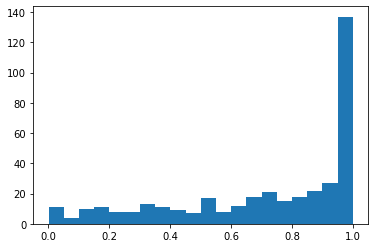

In [55]:
import pylab as plt
%matplotlib inline
plt.hist(s, bins=20)

In [56]:
def make_all_peaks(library):
    all_peak_mz = []
    all_peak_intensity = []
    all_spec = []
    for s in library:
        mz_list = list(s.peaks[0])
        all_peak_mz += mz_list
        intensity_list = list(s.peaks[1])
        all_peak_intensity += intensity_list
        all_spec += [s for m in mz_list]
    return list(zip(all_peak_mz, all_peak_intensity, all_spec))

In [57]:
all_peaks = make_all_peaks(library_spec)
all_peaks.sort(key = lambda x: x[0])
all_mz, all_intensity, all_s = zip(*all_peaks)
print(len(all_peaks))

115073


In [58]:
from matchms.Spectrum import Spectrum
import copy
def create_random_decoy(spectrum, all_mz, all_intensity):
    n_peaks = len(all_mz)
    precursor_mz = spectrum.metadata['precursor_mz']
    (pmz,pi) = has_frag(spectrum, precursor_mz, 0.2)
    mz = []
    intensity = []
    mz.append(pmz)
    intensity.append(pi)
    
    n_peaks = len(spectrum.peaks[0]) - 1
    max_pos = bisect.bisect_right(all_mz, precursor_mz)
    pos = np.random.choice(range(max_pos), size=n_peaks, replace=False)
    
    for p in pos:
        mz.append(all_mz[p])
        intensity.append(all_intensity[p])
    
    idx = np.argsort(mz)
    mz = np.array(mz)
    intensity = np.array(intensity)
    mz = mz[idx]
    intensity = intensity[idx]
    
    new_spectrum = Spectrum(np.array(mz), np.array(intensity), copy.deepcopy(spectrum.metadata))

    return new_spectrum

decoy_library = []
for l in library_spec:
    spec = create_random_decoy(l, all_mz, all_intensity)
    decoy_library.append(spec)

In [59]:
def create_spectral_decoy(spectrum, all_mz, all_intensity, all_s):
    precursor_mz = spectrum.metadata['precursor_mz']
    (pmz,pi) = has_frag(spectrum, precursor_mz, 0.2)
    mz = []
    intensity = []
    
    new_mz = pmz
    new_intensity = pi
    possible_peaks = []
    
    
    n_peaks = len(spectrum.peaks[0])
    for i in range(n_peaks):
        mz.append(new_mz)
        intensity.append(new_intensity)
    
        # find all spectra with something within 0.2
        min_mz = new_mz - 0.2
        max_mz = new_mz + 0.2
        pos = bisect.bisect_right(all_mz, min_mz)
        pos2 = bisect.bisect_right(all_mz, max_mz)
        assert pos2 > pos
        N = min(5, pos2 - pos)
        pos = np.random.choice(range(pos,pos2), size=N, replace=False)
        for p in pos:
            spec = all_s[p]
            max_pos = bisect.bisect_right(spec.peaks[0], pmz)
            if max_pos > 0:
                peak_pos = np.random.choice(max_pos)
                possible_peaks.append((spec.peaks[0][peak_pos], spec.peaks[1][peak_pos]))
        next_peak_idx = np.random.choice(len(possible_peaks))
        next_peak = possible_peaks[next_peak_idx]
        del possible_peaks[next_peak_idx]
        new_mz = next_peak[0]
        new_intensity = next_peak[1]
        
        
    idx = np.argsort(mz)
    mz = np.array(mz)
    intensity = np.array(intensity)
    mz = mz[idx]
    intensity = intensity[idx]

    new_spectrum = Spectrum(np.array(mz), np.array(intensity), copy.deepcopy(spectrum.metadata))

    return new_spectrum
    
create_spectral_decoy(library_spec[0], all_mz, all_intensity, all_s)

In [26]:
spec_library = []
for i,l in enumerate(library_spec):
    if i%100 == 0:
        print(i,len(library_spec))
    spec = create_spectral_decoy(l, all_mz, all_intensity, all_s)
    spec_library.append(spec)

0 2000
100 2000
200 2000
300 2000
400 2000
500 2000
600 2000
700 2000
800 2000
900 2000
1000 2000
1100 2000
1200 2000
1300 2000
1400 2000
1500 2000
1600 2000
1700 2000
1800 2000
1900 2000


In [60]:
decoy_hits = query(query_spec, decoy_library)

In [61]:
spec_decoy_hits = query(query_spec, spec_library)

In [62]:
decoy_hits = list(filter(lambda x: x[1] is not None, decoy_hits))
decoy_hits.sort(key = lambda x: x[1], reverse=True)
q,s,l = zip(*decoy_hits)

(array([34., 48., 48., 29., 28., 23., 23., 16., 17., 15., 12., 14., 14.,
        10., 10., 10., 12.,  7., 14.,  8.]),
 array([0.        , 0.04978225, 0.0995645 , 0.14934675, 0.199129  ,
        0.24891125, 0.2986935 , 0.34847575, 0.398258  , 0.44804025,
        0.4978225 , 0.54760475, 0.597387  , 0.64716925, 0.6969515 ,
        0.74673375, 0.796516  , 0.84629825, 0.8960805 , 0.94586275,
        0.995645  ]),
 <BarContainer object of 20 artists>)

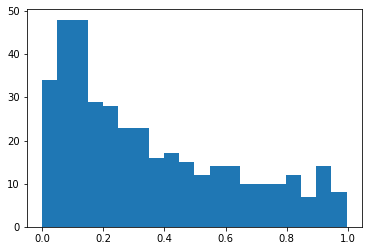

In [63]:
spec_decoy_hits = list(filter(lambda x: x[1] is not None, spec_decoy_hits))
spec_decoy_hits.sort(key = lambda x: x[1], reverse=True)
q,s,l = zip(*spec_decoy_hits)

plt.hist(s, bins=20)

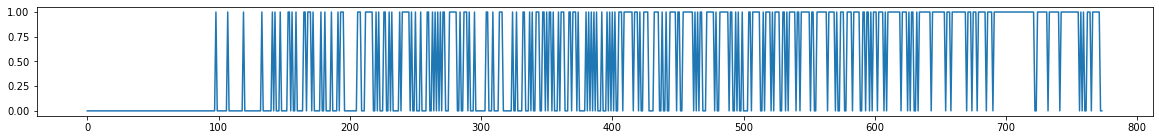

In [64]:
# table 1, columns are score, db (target/decoy)
fdr_table = []
for h in hits:
    fdr_table.append((h[0], h[1], 0))
for h in decoy_hits:
    fdr_table.append((h[0], h[1], 1))
fdr_table.sort(key = lambda x: x[1], reverse = True)
q, s, ss = zip(*fdr_table)
plt.figure(figsize=(20,2))
plt.plot(range(len(ss)), ss)

In [65]:
def fdr_q(fdr_table):
    fdr_table.sort(key=lambda x: x[1], reverse=True)
    fdr_vals = []
    queries,s,ss = zip(*fdr_table)
    for i in range(len(fdr_table)):
        fdr = sum(ss[:i])/(i+1)
        fdr_vals.append(fdr)
    q_vals = [0 for f in fdr_vals]
    q_vals[-1] = fdr_vals[-1]
    for i in range(len(q_vals)-2,0,-1):
        q_vals[i] = min(fdr_vals[i],q_vals[i+1])
    q_list = []
    for i,q in enumerate(queries):
        if ss[i] == 0: # i.e. the true one
            q_list.append((q, q_vals[i]))
    return fdr_vals, q_vals, q_list

In [66]:
fdr_vals, q_vals, q_list = fdr_q(fdr_table)

In [67]:
# table 1, columns are score, db (target/decoy)
spec_fdr_table = []
for h in hits:
    spec_fdr_table.append((h[0], h[1], 0))
for h in spec_decoy_hits:
    spec_fdr_table.append((h[0], h[1], 1))
spec_fdr_table.sort(key = lambda x: x[1], reverse = True)
spec_fdr_vals, spec_q_vals, spec_q_list = fdr_q(spec_fdr_table)

In [68]:
# make the true one
true_fdr_table = []
for h in hits:
    # check if it is correct
    query_ik = h[0].metadata['inchikey']
    library_ik = h[2].metadata['inchikey']
    if query_ik == library_ik:
        false = 0
    else:
        false = 1
    true_fdr_table.append((h[0], h[1], false))
true_fdr, true_q, true_q_list = fdr_q(true_fdr_table)

In [69]:
# find the pairs for the plot
plot_true = []
plot_estimated = []
spec_plot_estimated = []
qq,qqq = zip(*q_list)
spec_qq, spec_qqq = zip(*spec_q_list)
for qs, qval in true_q_list:
    assert qs in qq
    pos = qq.index(qs)
    plot_true.append(qval)
    plot_estimated.append(qqq[pos])
    pos = spec_qq.index(qs)
    spec_plot_estimated.append(spec_qqq[pos])

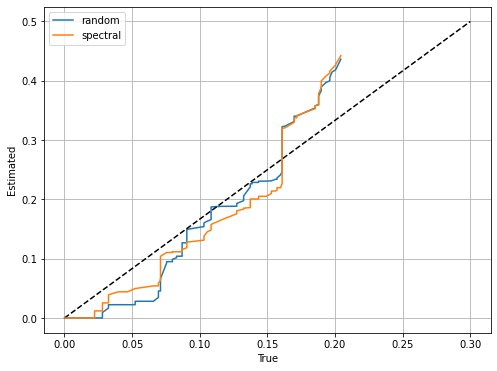

In [70]:
plt.figure(figsize=(8,6))
plt.plot(plot_true, plot_estimated, label='random')
plt.plot([0,0.5], [0,0.5], 'k--')
plt.plot(plot_true, spec_plot_estimated, label='spectral')
plt.xlabel('True')
plt.ylabel('Estimated')
plt.legend()
plt.grid()